# Exploratory Data Analysis: Modeling Home Prices

### Ben Warren and Jun Sik Kim

In [1]:
#import libraries
import pandas as pd
import geopandas as geo
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
#import data
df = pd.read_csv('Resources/filtered.csv')
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

/var/folders/yn/1kz4ntb144195kbxp2lt33tc0000gn/T/ipykernel_31003/457192753.py:2: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Resources/filtered.csv')


In [3]:
df.head()

,city,address,zip_code,parcel_id,location,sale_date,sale_price
0,PHILADELPHIA,1841 OAKMONT ST,19111.0,50016134.0,NaN,2000-01-05 05:00:00+00:00,88000.0
1,PHILADELPHIA,4516 ALDINE ST,19136.0,50015541.0,NaN,2000-01-04 05:00:00+00:00,39515.0
2,PHILADELPHIA,821 CATHARINE ST,19147.0,50018248.0,NaN,2000-01-07 05:00:00+00:00,150000.0
3,PHILADELPHIA,3311 W PENN ST,19129.0,50018066.0,NaN,2000-01-07 05:00:00+00:00,115000.0
4,PHILADELPHIA,211 N CECIL ST,19139.0,50018288.0,NaN,2000-01-07 05:00:00+00:00,25000.0


In [86]:
len(df)

1794726

In [8]:
#What cities are we working with?
df.city.value_counts()

city
PHILADELPHIA       225542
DETROIT            173245
PITTSBURGH         168576
Bridgeport          37600
Stamford            36501
                    ...  
MCKEES ROCKS            1
INGOMAR                 1
CUDDY                   1
CURTISVILLE             1
***Unknown***           1
Name: count, Length: 268, dtype: int64

**Years available by city**

In [61]:
#cut off extra data from date string
df['sale_date'] = df['sale_date'].apply(lambda x: x[:10])

#add a year column
df['sale_year'] = df['sale_date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").year)
df['sale_year']

0          2000
1          2000
2          2000
3          2000
4          2000
           ... 
1794721    2022
1794722    2023
1794723    2023
1794724    2023
1794725    2023
Name: sale_year, Length: 1794726, dtype: int64

In [31]:
#group by year and city
year_by_city = df.groupby(['city', 'sale_year']).count()['address']

#top city/year combinations in data
year_by_city.sort_values(ascending=False)

city           sale_year
PHILADELPHIA   2005         41076
               2004         38431
               2006         34899
               2003         31502
               2002         29417
                            ...  
CECIL          2023             1
               2021             1
               2020             1
               2013             1
***Unknown***  2007             1
Name: address, Length: 4905, dtype: int64

In [32]:
#Philadelphia is the city with the most data
philly_data = df[df['city'] == 'PHILADELPHIA']
philly_data.groupby("sale_year").count()

,city,address,zip_code,parcel_id,location,sale_date,sale_price
sale_year,,,,,,,
2000,23485,23485,23085,23485,0,23485,23485
2001,26732,26732,26390,26732,0,26732,26732
2002,29417,29417,29101,29417,0,29417,29417
2003,31502,31502,31136,31502,0,31502,31502
2004,38431,38431,38036,38431,0,38431,38431
2005,41076,41076,40701,41076,0,41076,41076
2006,34899,34899,34474,34899,0,34899,34899


In [37]:
detroit_data = df[df['city'] == 'DETROIT']
detroit_data.groupby("sale_year").count()

,city,address,zip_code,parcel_id,location,sale_date,sale_price
sale_year,,,,,,,
2011,9324,9319,0,9324,9324,9324,9324
2012,9567,9565,0,9567,9567,9567,9567
2013,11165,11161,0,11165,11165,11165,11165
2014,13315,13306,0,13315,13315,13315,13315
2015,11989,11982,0,11989,11989,11989,11989
2016,10482,10469,0,10482,10482,10482,10482
2017,12184,12156,0,12184,12184,12184,12184
2018,14873,14848,0,14873,14873,14873,14873
2019,14350,14313,0,14350,14350,14350,14350


In [38]:
pitt_data = df[df['city'] == 'PITTSBURGH']
pitt_data.groupby('sale_year').count()

,city,address,zip_code,parcel_id,location,sale_date,sale_price
sale_year,,,,,,,
2012,11141,11141,11141,11141,0,11141,11141
2013,11904,11904,11904,11904,0,11904,11904
2014,11999,11999,11999,11999,0,11999,11999
2015,12613,12613,12613,12613,0,12613,12613
2016,13189,13189,13189,13189,0,13189,13189
2017,13703,13703,13703,13703,0,13703,13703
2018,13921,13921,13921,13921,0,13921,13921
2019,13646,13646,13646,13646,0,13646,13646
2020,13300,13300,13300,13300,0,13300,13300


**Number of sales by year**

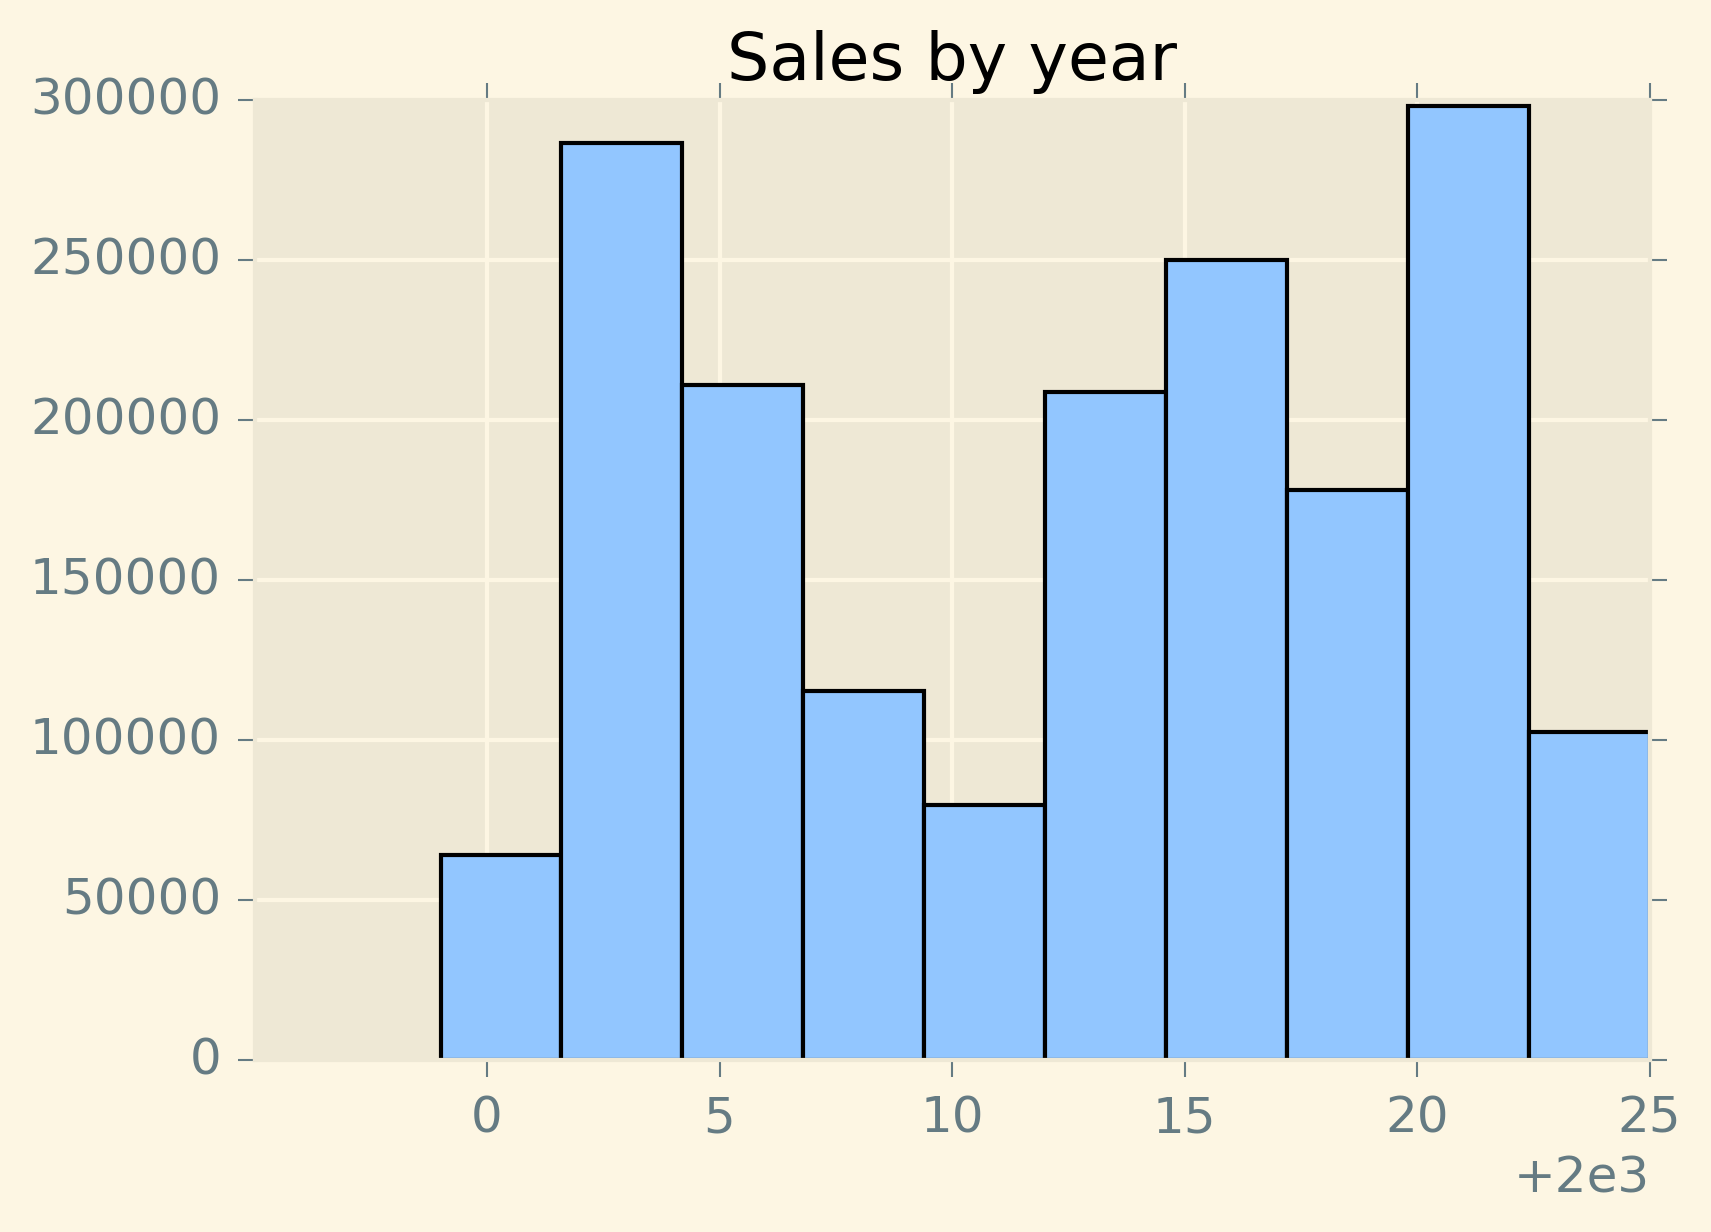

In [103]:
#histogram of sales by year
plt.style.use('seaborn-pastel')
plt.figure(figsize=(6,4), dpi=300)
plt.hist(df['sale_year'])
plt.title('Sales by year')
plt.xticks(np.arange(2000, 2030, 5))
plt.show()

**Price breakdown**

Text(0.5, 1.0, 'Sales by price (under $1mil)')

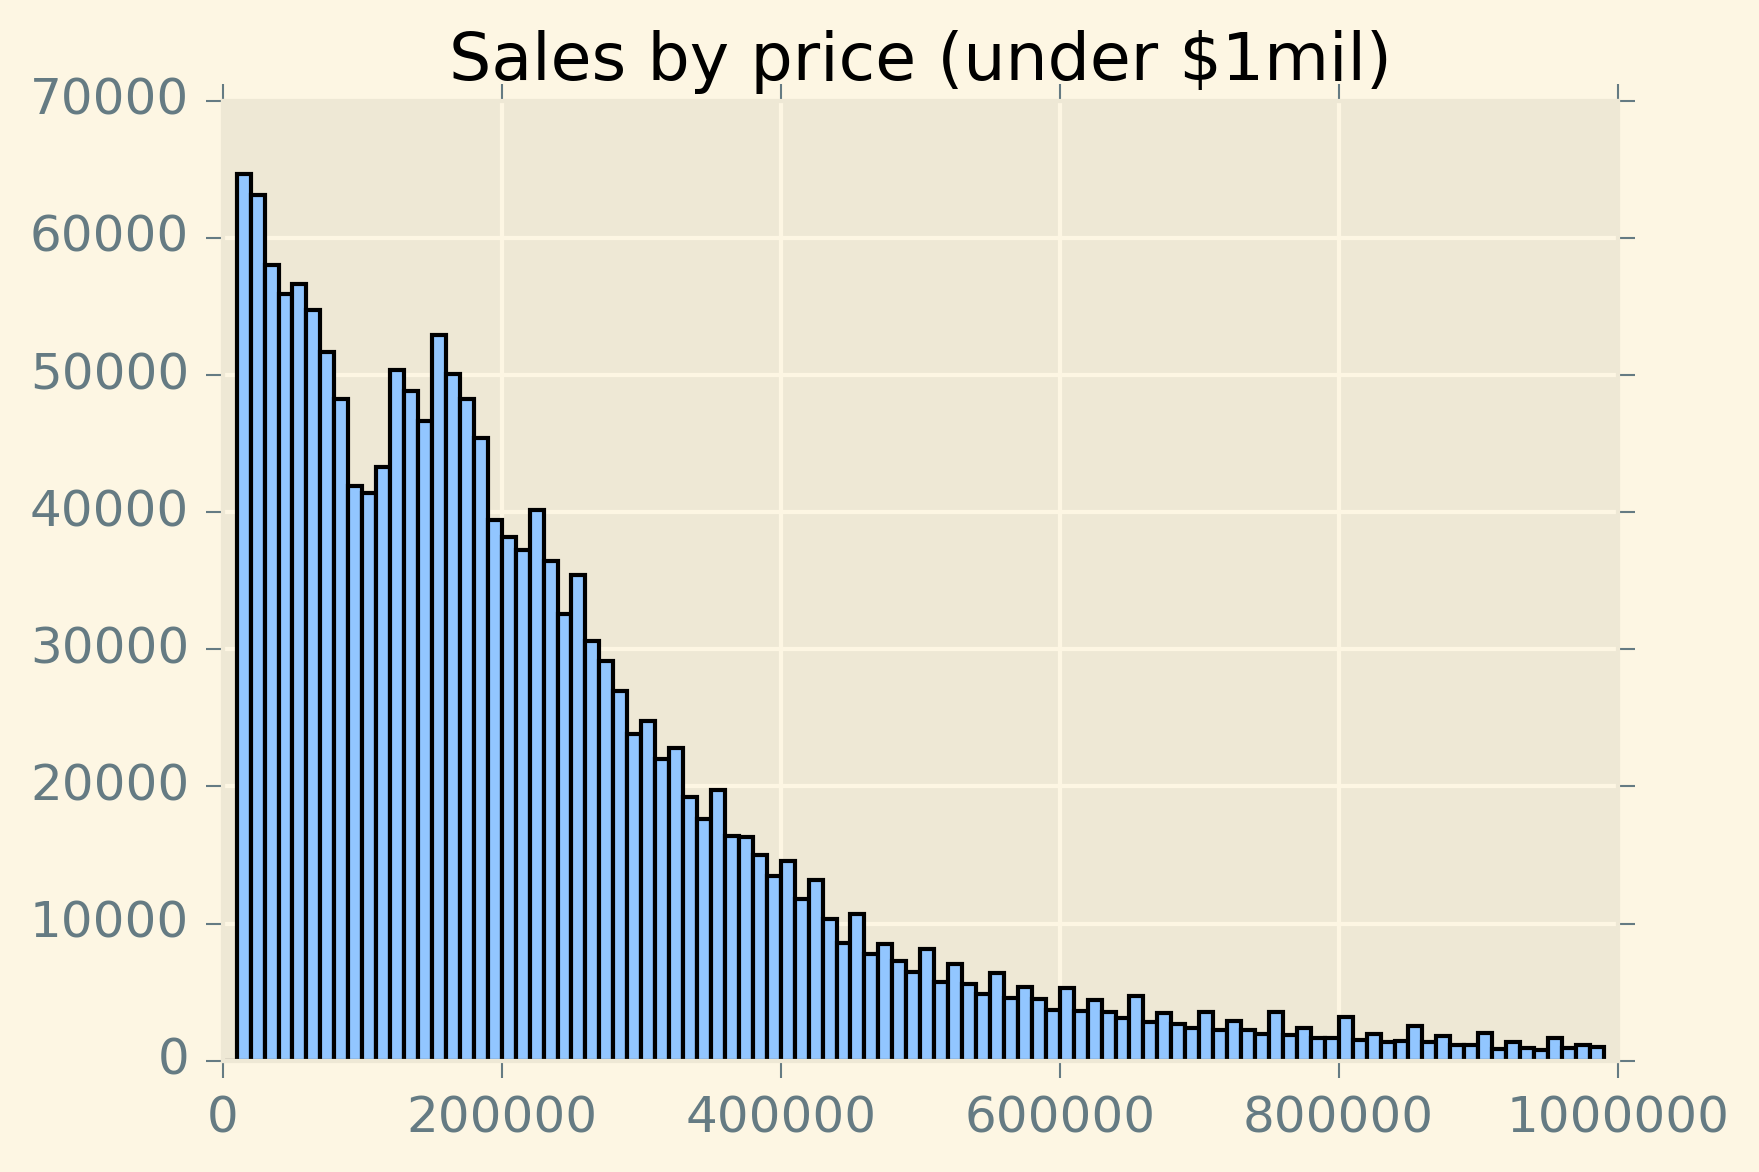

In [104]:
#divide into under a million/over a million
under_mil= df[df['sale_price'] < 1000000]
over_mil = df[df['sale_price'] >= 1000000]

#histogram of price (under a million)
plt.figure(figsize=(6,4), dpi=300)
plt.hist(under_mil['sale_price'], bins=np.arange(0, 1000000, 10000))
plt.title('Sales by price (under $1mil)')

**Price by year**

(1998.0, 2026.0)

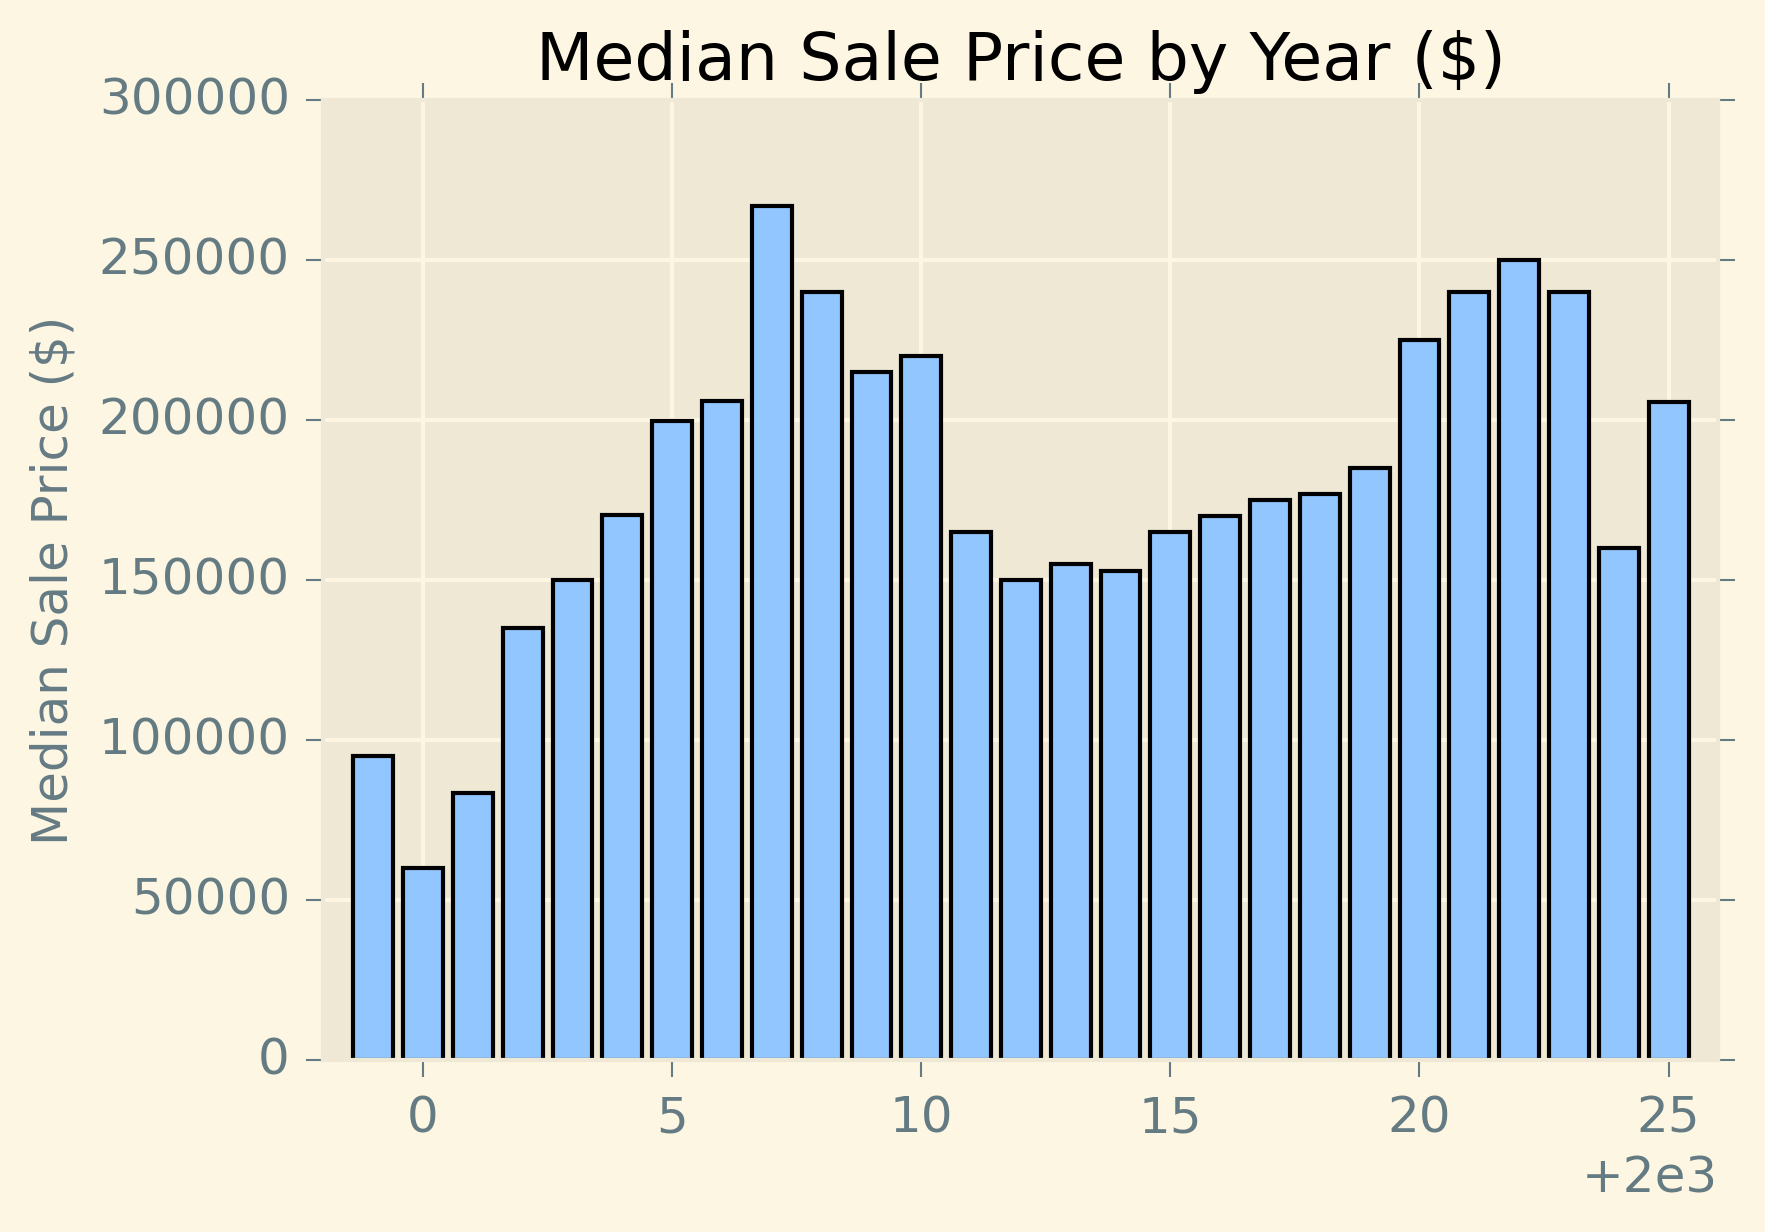

In [113]:
#median price by year
med_years = df[['sale_price', 'sale_year']].groupby('sale_year').median()
med_years = med_years.reset_index()

plt.figure(figsize=(6,4), dpi=300)
plt.bar(med_years['sale_year'], med_years['sale_price'])
plt.title('Median Sale Price by Year ($)')
plt.ylabel('Median Sale Price ($)')
plt.xlim((1998, 2026))

## Using location data w/ Geopandas

In [62]:
#Some of the rows have location data
loc_data = df.dropna(subset = ['location'])
loc_data.describe()

,zip_code,sale_price,sale_year
count,0.0,4.688330e+05,468833.000000
mean,NaN,3.684151e+05,2016.112042
std,NaN,3.613680e+06,6.475177
min,NaN,1.000100e+04,2001.000000
25%,NaN,6.100000e+04,2012.000000
50%,NaN,1.780000e+05,2018.000000
75%,NaN,3.350000e+05,2022.000000
max,NaN,7.000000e+08,2025.000000


In [63]:
#Which cities?
loc_data['city'].value_counts()

city
DETROIT       173245
Stamford       10253
Waterbury       9841
Bridgeport      9603
Norwalk         8151
               ...  
Cornwall         148
Warren           147
Bozrah           126
Hartland         115
Union             69
Name: count, Length: 170, dtype: int64

In [79]:
#Using detroit data with locations
detroit_data = loc_data[loc_data['city'] == 'DETROIT']
detroit_data.head()

,city,address,zip_code,parcel_id,location,sale_date,sale_price,sale_year
225542,DETROIT,14006 GLASTONBURY,NaN,22081917.,POINT (-83.2244243000632 42.3881325806263),2015-01-27,13500.0,2015
225543,DETROIT,5505 E DAVISON,NaN,13007654-5,POINT (-83.0471320690442 42.4212806141444),2015-01-27,31774.0,2015
225544,DETROIT,120 SEWARD 15/201,NaN,02001199.015,POINT (-83.078785805209 42.3744717076778),2015-01-27,37000.0,2015
225545,DETROIT,511 ARDEN PARK,NaN,03002667.,POINT (-83.0780814383237 42.3890459407808),2015-01-27,72101.0,2015
225546,DETROIT,15325 SNOWDEN,NaN,22028275.,POINT (-83.1772965792333 42.4025712013837),2015-01-27,19950.0,2015


In [80]:
#convert to a geopandas df
detroit_data['location'] = geo.GeoSeries.from_wkt(detroit_data['location'])
geo_detroit = geo.GeoDataFrame(detroit_data, geometry='location')
#set crs
geo_detroit = geo_detroit.set_crs(epsg=4326)
geo_detroit = geo_detroit.to_crs(epsg=3857)

/var/folders/yn/1kz4ntb144195kbxp2lt33tc0000gn/T/ipykernel_82868/2512493028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detroit_data['location'] = geo.GeoSeries.from_wkt(detroit_data['location'])


,city,address,zip_code,parcel_id,location,sale_date,sale_price,sale_year
225542,DETROIT,14006 GLASTONBURY,NaN,22081917.,POINT (-83.22442 42.38813),2015-01-27,13500.0,2015
225543,DETROIT,5505 E DAVISON,NaN,13007654-5,POINT (-83.04713 42.42128),2015-01-27,31774.0,2015
225544,DETROIT,120 SEWARD 15/201,NaN,02001199.015,POINT (-83.07879 42.37447),2015-01-27,37000.0,2015
225545,DETROIT,511 ARDEN PARK,NaN,03002667.,POINT (-83.07808 42.38905),2015-01-27,72101.0,2015
225546,DETROIT,15325 SNOWDEN,NaN,22028275.,POINT (-83.17730 42.40257),2015-01-27,19950.0,2015


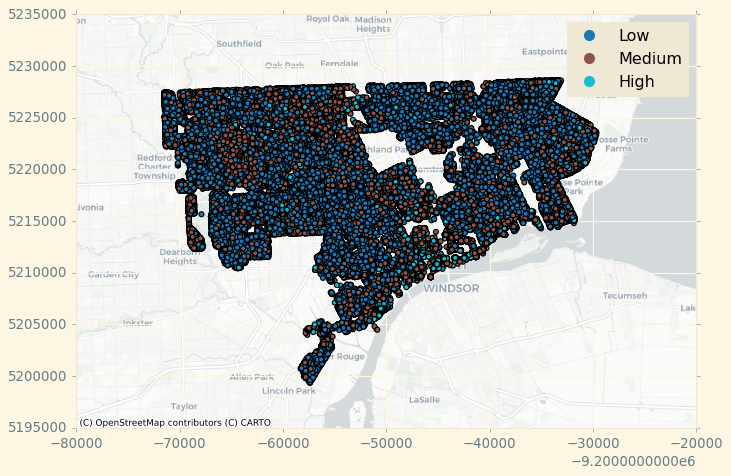

In [119]:
#plot Detroit homes
import contextily as cx
# bins = [0, 100000, 500000, 1000000]
# labels = ['Low', 'Medium', 'High']
# geo_detroit['price_scale'] = pd.cut(geo_detroit['sale_price'], bins=bins, labels=labels, right=False)

ax = geo_detroit.plot(figsize=(10,10), column='price_scale', legend=True)
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)